## Name : Omkar Thawakar
#### Comparison of EBPTA with momentum and without momrntum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### With Momentum

In [4]:
class NN:
    def __init__(self,layers,l1_neurons,l2_neurons,eta=0.1):
        self.layers = layers
        self.l1_n = l1_neurons
        self.l2_n = l2_neurons
        self.eta=eta
        
    def init_weights(self,X):
        #self.w = np.random.uniform(-1,1,size=(self.l2_n,self.l1_n+1))
        #self.v = np.random.uniform(-1,1,size=(self.l1_n,np.array(X).shape[1]+1))
        self.v = np.array([[ 0.08868918,  0.37197637,  0.39938742],[-0.89637786, -0.70038985, -0.39341202]])
        self.w = np.array([[-0.78585663, -0.40077185,  0.92580775]])
        
        
    def aug_inputs(self,X):
        arr=np.array([])
        for x in X:
            y=np.append(x,-1)
            arr=np.append(arr,y)
        arr=arr.reshape((X.shape[0],X.shape[1]+1))
        return arr
    
    def train(self,X,outputs,epochs):
        self.v = self.v
        self.w =self.w
        X = self.aug_inputs(X)
        print("Augmented input pattern : ",X)
        self.error_ = []
        epoch=1
        p = 0
        start_time = time.time()
        for i in range(epochs):
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x,self.v)
                out_inputs = np.insert(out,0,-1) #augmented input pattern of output layer
                out_out = self.predict(out_inputs,self.w)
                
                del_w = []
                for d_,o_ in zip(d,out_out):
                    del_w.append(((d_-o_)*o_*(1-o_)))
                
                del_v = []
                for o_ in out:
                    for i in range(len(self.w)):
                        temp_sum = 0
                        for j in range(len(self.w[i])):
                            temp_sum+=del_w*self.w[:,i]
                        del_v.append(o_*(1-o_)*temp_sum)
                
                delta_w = []
                for _ in del_w:
                    delta_w.append(self.eta*_*np.array(out_inputs))
     
                for _ in range(len(self.w)):
                    self.w[i] = self.w[i] + delta_w[i]   
                
                delta_v = []
                for _ in del_v:
                    delta_v.append(self.eta*_*np.array(x))

                self.v = self.v + np.array(delta_v)
 
                err = d-out_out   
            
                p+=1
                
            self.error_.append(sum(np.array(err)**2)/2)    
            epoch+=1
            
            if self.error_[-1] <=0.001 :
                break     
        print("Training Steps Required are {} .".format(p))
        print('Final Error : ',self.error_[-1])
        print('Time taken for training is : {} seconds'.format(time.time()-start_time))
        
        return self
                                                                           
    def get_weights(self):
        return self.weights
                                                                           
    def net_input(self,X,weights):
        return np.dot(weights,X)
    
    def activation(self,net):
        return 1/(1+np.exp(-net))
        
    def gradient(self,out):
        return out*(1-out)
 
    def predict(self,x,weights):
        #print("Net : ",self.net_input(np.array(x),weights))
        net = self.net_input(np.array(x),weights)
        return self.activation(net)
        

In [33]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([[0],[1],[1],[0]])

nn = NN(2,2,1,eta=0.1)
nn.init_weights(X)
print("Initial Weights of hidden layer are : ",nn.v)
print("Initial Weights of output layer are : ",nn.w)
nn.train(X,d,10000)

Initial Weights of hidden layer are :  [[ 0.08868918  0.37197637  0.39938742]
 [-0.89637786 -0.70038985 -0.39341202]]
Initial Weights of output layer are :  [[-0.78585663 -0.40077185  0.92580775]]
Augmented input pattern :  [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Training Steps Required are 40000 .
Final Error :  0.0011993295451535218
Time taken for training is : 4.625869989395142 seconds


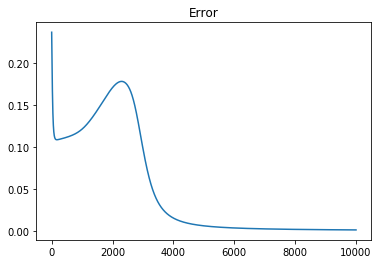

In [6]:
plt.plot(nn.error_)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.show()

### Visualization of Decision Boundaries

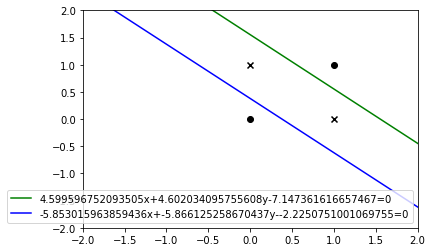

In [7]:
for i,j in zip(X,d):
    plt.scatter(i[0],i[1],c='k' ,marker='x' if j==[1]  else 'o' )

    
x = np.arange(-10,15)
a1,b1,c1 = nn.v[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='{}x+{}y-{}=0'.format(a1,b1,c1))

a2,b2,c2 = nn.v[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='{}x+{}y-{}=0'.format(a2,b2,c2))

plt.ylim([-2,2])
plt.xlim([-2,2])
plt.legend()
plt.show()

### With Momentum

In [38]:
class NN_With_Momentum:
    def __init__(self,layers,l1_neurons,l2_neurons,eta=0.1,alpha=0.8):
        self.layers = layers
        self.l1_n = l1_neurons
        self.l2_n = l2_neurons
        self.eta=eta
        self.alpha=alpha
        
    def init_weights(self,X):
        #self.w = np.random.uniform(-1,1,size=(self.l2_n,self.l1_n+1))
        #self.v = np.random.uniform(-1,1,size=(self.l1_n,np.array(X).shape[1]+1))
        self.v = np.array([[ 0.08868918,  0.37197637,  0.39938742],[-0.89637786, -0.70038985, -0.39341202]])
        self.w = np.array([[-0.78585663, -0.40077185,  0.92580775]])
        
        
    def aug_inputs(self,X):
        arr=np.array([])
        for x in X:
            y=np.append(x,-1)
            arr=np.append(arr,y)
        arr=arr.reshape((X.shape[0],X.shape[1]+1))
        return arr
    
    def train(self,X,outputs,epochs):
        self.v = self.v
        self.w =self.w
        X = self.aug_inputs(X)
        print("Augmented input pattern : ",X)
        self.error_ = []
        epoch=1
        p = 0
        start_time = time.time()
        momentum_w = np.zeros(self.w.shape)
        momentum_v = np.zeros(self.v.shape)
        for i in range(epochs):
            err=0
            for x,d in zip(X,outputs):
                out = self.predict(x,self.v)
                out_inputs = np.insert(out,0,-1) #augmented input pattern of output layer
                out_out = self.predict(out_inputs,self.w)
          
                del_w = []
                for d_,o_ in zip(d,out_out):
                    del_w.append(((d_-o_)*o_*(1-o_)))
                
                del_v = []
                for o_ in out:
                    for i in range(len(self.w)):
                        temp_sum = 0
                        for j in range(len(self.w[i])):
                            temp_sum+=del_w*self.w[:,i]
                        del_v.append(o_*(1-o_)*temp_sum)
                
                delta_w = []
                for _ in del_w:
                    delta_w.append(self.eta*_*np.array(out_inputs))
                
                for i in range(len(self.w)):
                    self.w[i] = self.w[i] + delta_w[i] + self.alpha*momentum_w[i]
                    
                momentum_w = delta_w
                    
                delta_v = []
                for _ in del_v:
                    delta_v.append(self.eta*_*np.array(x))
                self.v = self.v + np.array(delta_v)  
                
                err = d-out_out   
            
                p+=1
                
            self.error_.append(sum(np.array(err)**2)/2)    
            epoch+=1
            
            if self.error_[-1] <=0.001 :
                break     
        print("Training Steps Required are {} .".format(p))
        print('Final Error : ',self.error_[-1])
        print('Time taken for training is : {} seconds'.format(time.time()-start_time))
        
        return self
                                                                           
    def get_weights(self):
        return self.weights
                                                                           
    def net_input(self,X,weights):
        return np.dot(weights,X)
    
    def activation(self,net):
        return 1/(1+np.exp(-net))
        
    def gradient(self,out):
        return out*(1-out)
 
    def predict(self,x,weights):
        #print("Net : ",self.net_input(np.array(x),weights))
        net = self.net_input(np.array(x),weights)
        return self.activation(net)
        

In [39]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([[0],[1],[1],[0]])

nn2 = NN_With_Momentum(2,2,1,eta=0.1)
nn2.init_weights(X)
print("Initial Weights of hidden layer are : ",nn2.v)
print("Initial Weights of output layer are : ",nn2.w)
nn2.train(X,d,10000)

Initial Weights of hidden layer are :  [[ 0.08868918  0.37197637  0.39938742]
 [-0.89637786 -0.70038985 -0.39341202]]
Initial Weights of output layer are :  [[-0.78585663 -0.40077185  0.92580775]]
Augmented input pattern :  [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Training Steps Required are 30452 .
Final Error :  0.000999796483829724
Time taken for training is : 4.014671087265015 seconds


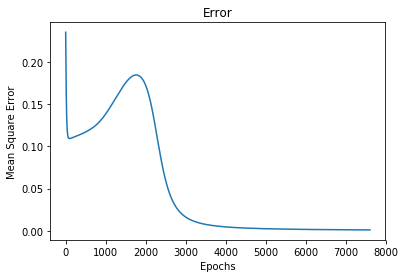

In [40]:
plt.plot(nn2.error_)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.show()

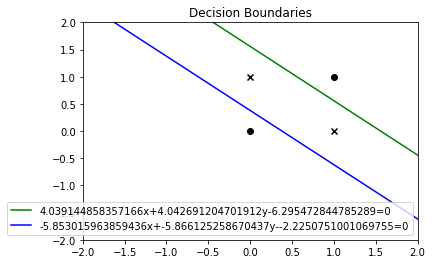

In [43]:
for i,j in zip(X,d):
    plt.scatter(i[0],i[1],c='k' ,marker='x' if j==[1]  else 'o' )

    
x = np.arange(-10,15)
a1,b1,c1 = nn2.v[0]
y1 = (c1-a1*x)/b1
plt.plot(x,y1,c='g',label='{}x+{}y-{}=0'.format(a1,b1,c1))

a2,b2,c2 = nn.v[1]
y2 = (c2-a2*x)/b2
plt.plot(x,y2,c='b',label='{}x+{}y-{}=0'.format(a2,b2,c2))

plt.title('Decision Boundaries')

plt.ylim([-2,2])
plt.xlim([-2,2])
plt.legend()
plt.show()